In [1]:
# Import required libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import mplfinance as mpf
%matplotlib widget

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_btc_hourly= pd.read_csv('BTC-Hourly.csv')
df_btc_daily= pd.read_csv('BTC-Daily.csv')

In [3]:
df = df_btc_daily

Basic Data Exploration

In [4]:
# Display the first few rows of the dataframe
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [5]:
# Display summary statistics
df.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,2.651000e+03,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03
mean,1.531613e+09,11693.189332,12038.562912,11296.539461,11709.326213,1.330041e+07,6.099369e+07
std,6.613247e+07,16272.554746,16739.237000,15718.297511,16282.908704,4.715366e+07,1.072838e+08
min,1.417133e+09,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,1.474373e+09,654.680000,664.460000,640.050000,654.370000,5.357883e+03,9.516170e+03
50%,1.531613e+09,6408.950000,6540.000000,6312.000000,6407.770000,1.503310e+04,2.288982e+07
75%,1.588853e+09,10708.620000,10956.240000,10303.755000,10726.425000,3.435336e+06,8.018383e+07
max,1.646093e+09,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


In [6]:
# Check for missing values
df.isnull().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [7]:
# Get information about data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        2651 non-null   int64  
 1   date        2651 non-null   object 
 2   symbol      2651 non-null   object 
 3   open        2651 non-null   float64
 4   high        2651 non-null   float64
 5   low         2651 non-null   float64
 6   close       2651 non-null   float64
 7   Volume BTC  2651 non-null   float64
 8   Volume USD  2651 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 186.5+ KB


In [8]:
# Get data only from the last year

df['date'] = pd.to_datetime(df['date'])

# Find the maximum date in your dataset
max_date = df['date'].max()

# Calculate the date one year back from the maximum date
one_year_ago = max_date - pd.DateOffset(years=1)

# Filter the dataset to include only the last year of data
df = df[df['date'] > one_year_ago]

Price Movement Visualisation

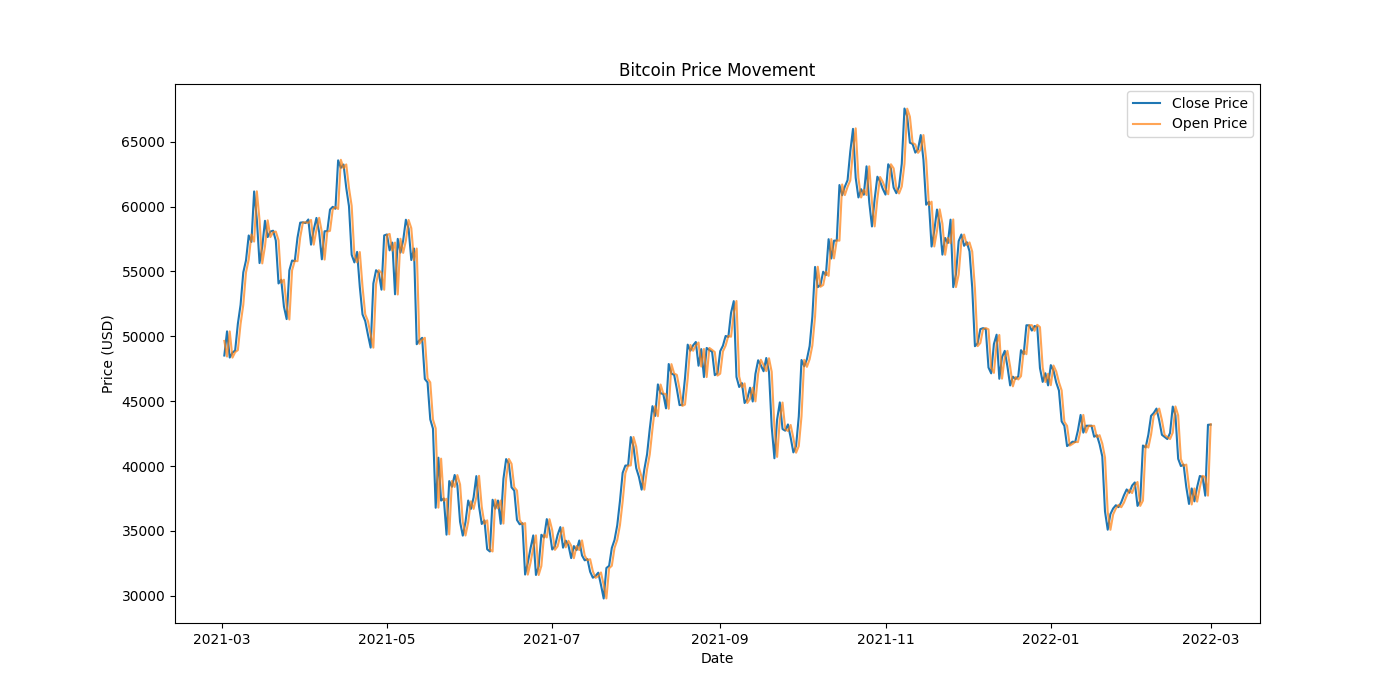

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['close'], label='Close Price')
plt.plot(df['date'], df['open'], label='Open Price', alpha=0.7)
plt.title('Bitcoin Price Movement')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

### Candlestick Price Movement Chart

- For a green (bullish) candle, the bottom of the body represents the open price, and the top of the body represents the close price for that day. The wicks extending from the body show the high and low prices for the day.
- For a red (bearish) candle, the top of the body is the open price, and the bottom of the body is the close price for that day.
- The highest price achieved during the time frame. This is represented by the top of the candle's wick or shadow, which is the thin line that extends from the body.
- The lowest price achieved during the time frame. This is represented by the bottom of the candle's wick or shadow.

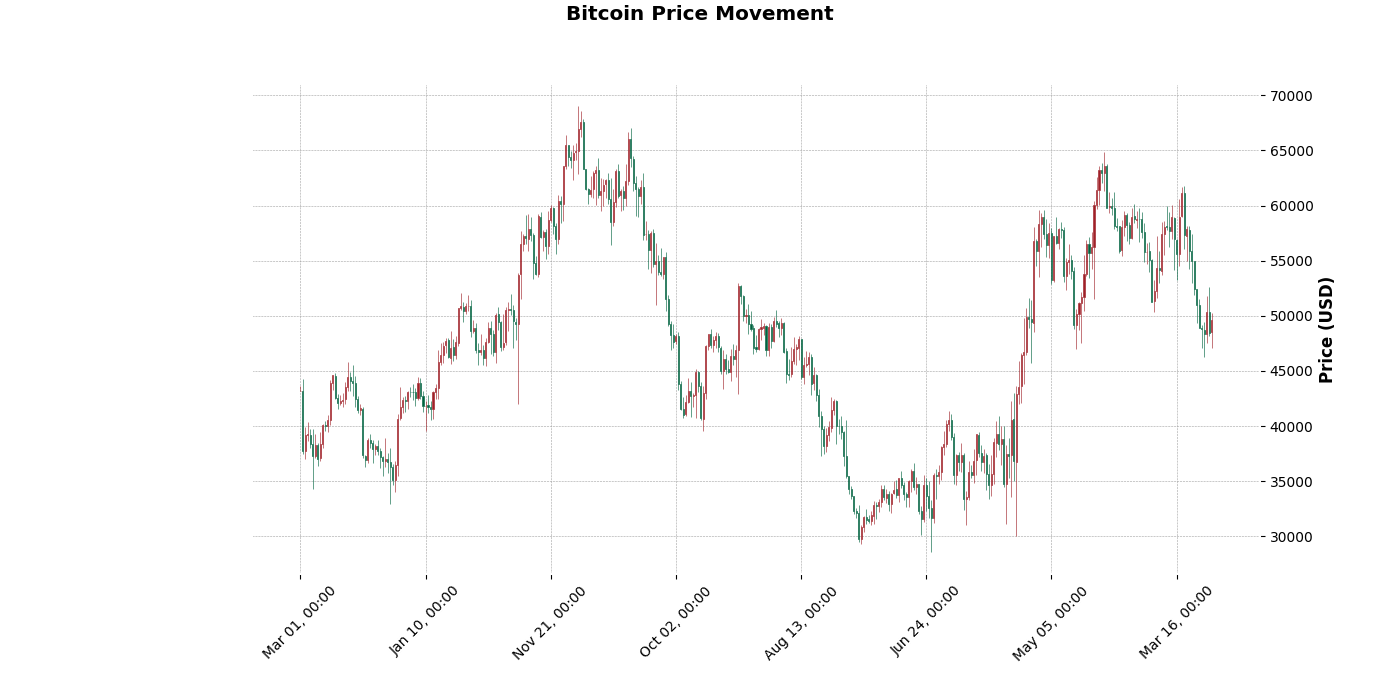

In [10]:
df_cdstick = df.copy() 
df_cdstick['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df_cdstick.set_index('date', inplace=True)

# Rename columns to match mplfinance requirements, if necessary
df_cdstick.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'Volume BTC': 'Volume'}, inplace=True)


# Configure and display the candlestick chart
mpf.plot(df_cdstick, type='candle', style='charles',
         title='Bitcoin Price Movement',
         ylabel='Price (USD)',
         figsize=(14, 7))